---
title: "R analysis of bulkRNA expression matrix"
author: "Jacob Egemose Høgfeldt"
image: ./2024-08-20-ABC3/rnaseq.png
date: 2024-08-20
categories: [R, bulkRNA]
eval: false
---

# Slides

Data formats and bulkRNA sequencing exercise

&nbsp;

 <p align="center">
  <a href="https://abc.au.dk/documentation/slides/20240820-ABC.3.zip" style="background-color: #4266A1; color: #FFFFFF; padding: 30px 20px; text-decoration: none; border-radius: 5px;">
    Download Slides
  </a>
</p>

&nbsp;

# Tutorial

The following tutorial shows how to do read an expression matrix from a test file and prepare it for bulkRNA analysis with DeSeq2. Further analysis with DeSeq2 will be into another tutorial at future ABC sessions.

## Install packages

First of all you need quite some packages for bulkRNA analysis. The following installations will also help in the fiture analysis tutorial where various different plots are explored. Note how you install some packages with `install.packages` (from the R default channel) and with `BiocManager::install` (from the BiocManager channel)."





In [1]:
#| output: false

install.packages("ggplot2")
install.packages("pheatmap")
install.packages("ggrepel")
install.packages("openxlsx")
install.packages("readxl")
install.packages("tidyverse")
install.packages("RColorBrewer")
install.packages("pdftools")
install.packages("dplyr")
install.packages("ggridges")
install.packages("forcats")
install.packages("igraph")

# Install Bioconductor packages
if (!requireNamespace("BiocManager", quietly = TRUE)) {
    install.packages("BiocManager")
}

BiocManager::install("edgeR")
BiocManager::install("DESeq2")
BiocManager::install("ComplexHeatmap")
BiocManager::install("clusterProfiler")
BiocManager::install("org.Hs.eg.db")
BiocManager::install("org.Mm.eg.db")
BiocManager::install("AnnotationDbi")
BiocManager::install("pathview")
BiocManager::install("DOSE")
BiocManager::install("enrichplot")
BiocManager::install("ReactomePA")
BiocManager::install("SummarizedExperiment")

Warning message:
"dependencies 'MASS', 'Matrix' are not available"
also installing the dependencies 'lattice', 'colorspace', 'nlme', 'farver', 'labeling', 'munsell', 'RColorBrewer', 'viridisLite', 'gtable', 'isoband', 'mgcv', 'scales'





  There are binary versions available but the source versions are later:
             binary  source needs_compilation
lattice      0.21-8  0.22-6              TRUE
colorspace    2.1-0   2.1-1              TRUE
nlme        3.1-162 3.1-166              TRUE
farver        2.1.1   2.1.2              TRUE
labeling      0.4.2   0.4.3             FALSE
munsell       0.5.0   0.5.1             FALSE
viridisLite   0.4.1   0.4.2             FALSE
gtable        0.3.3   0.3.5             FALSE
mgcv         1.8-42   1.9-1              TRUE
scales        1.2.1   1.3.0              TRUE
ggplot2       3.4.2   3.5.1             FALSE

  Binaries will be installed
package 'lattice' successfully unpacked and MD5 sums checked
package 'colorspace' successfully unpacked and MD5 sums checked
package 'nlme' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'isoband' successfully unpa

installing the source packages 'labeling', 'munsell', 'viridisLite', 'gtable', 'ggplot2'


Warning message in install.packages("ggplot2"):
"installation of package 'ggplot2' had non-zero exit status"


package 'pheatmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\au612681\AppData\Local\Temp\RtmpQdhH32\downloaded_packages


Warning message:
"dependency 'MASS' is not available"
also installing the dependencies 'scales', 'ggplot2', 'Rcpp'





  There are binary versions available but the source versions are later:
        binary source needs_compilation
scales   1.2.1  1.3.0              TRUE
ggplot2  3.4.2  3.5.1             FALSE
Rcpp    1.0.10 1.0.13              TRUE
ggrepel  0.9.3  0.9.5              TRUE

  Binaries will be installed
package 'scales' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked
package 'ggrepel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\au612681\AppData\Local\Temp\RtmpQdhH32\downloaded_packages


installing the source package 'ggplot2'


Warning message in install.packages("ggrepel"):
"installation of package 'ggplot2' had non-zero exit status"
also installing the dependencies 'stringi', 'zip'





  There are binary versions available but the source versions are later:
          binary  source needs_compilation
stringi   1.7.12   1.8.4              TRUE
zip        2.3.0   2.3.1              TRUE
openxlsx 4.2.5.2 4.2.6.1              TRUE

  Binaries will be installed
package 'stringi' successfully unpacked and MD5 sums checked
package 'zip' successfully unpacked and MD5 sums checked
package 'openxlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\au612681\AppData\Local\Temp\RtmpQdhH32\downloaded_packages


also installing the dependencies 'rematch', 'hms', 'prettyunits', 'cellranger', 'cpp11', 'progress'





  There are binary versions available but the source versions are later:
            binary source needs_compilation
rematch      1.0.1  2.0.0             FALSE
prettyunits  1.1.1  1.2.0             FALSE
cpp11        0.4.3  0.4.7             FALSE
progress     1.2.2  1.2.3             FALSE
readxl       1.4.2  1.4.3              TRUE

  Binaries will be installed
package 'hms' successfully unpacked and MD5 sums checked
package 'cellranger' successfully unpacked and MD5 sums checked
package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\au612681\AppData\Local\Temp\RtmpQdhH32\downloaded_packages


installing the source packages 'rematch', 'prettyunits', 'cpp11', 'progress'


Warning message:
"dependency 'MASS' is not available"
also installing the dependencies 'sys', 'bit', 'ps', 'sass', 'cachem', 'rappdirs', 'askpass', 'bit64', 'processx', 'highr', 'xfun', 'yaml', 'bslib', 'fontawesome', 'jquerylib', 'tinytex', 'backports', 'memoise', 'blob', 'DBI', 'tidyselect', 'data.table', 'scales', 'gargle', 'curl', 'ids', 'rematch2', 'mime', 'openssl', 'timechange', 'systemfonts', 'textshaping', 'clipr', 'vroom', 'tzdb', 'callr', 'fs', 'knitr', 'rmarkdown', 'selectr', 'broom', 'conflicted', 'dbplyr', 'dtplyr', 'forcats', 'ggplot2', 'googledrive', 'googlesheets4', 'haven', 'httr', 'lubridate', 'modelr', 'purrr', 'ragg', 'readr', 'reprex', 'rstudioapi', 'rvest', 'stringr', 'tidyr', 'xml2'





  There are binary versions available but the source versions are later:
              binary source needs_compilation
sys            3.4.1  3.4.2              TRUE
ps             1.7.5  1.7.7              TRUE
sass           0.4.5  0.4.9              TRUE
cachem         1.0.7  1.1.0              TRUE
askpass          1.1  1.2.0              TRUE
processx       3.8.1  3.8.4              TRUE
highr           0.10   0.11             FALSE
xfun            0.39   0.47              TRUE
yaml           2.3.7 2.3.10              TRUE
bslib          0.4.2  0.8.0             FALSE
fontawesome    0.5.1  0.5.2             FALSE
tinytex         0.45   0.52             FALSE
backports      1.4.1  1.5.0              TRUE
DBI            1.1.3  1.2.3             FALSE
tidyselect     1.2.0  1.2.1              TRUE
data.table    1.14.8 1.15.4              TRUE
scales         1.2.1  1.3.0              TRUE
gargle         1.4.0  1.5.2             FALSE
curl           5.0.0  5.2.1              TRUE
openss

installing the source packages 'highr', 'bslib', 'fontawesome', 'tinytex', 'DBI', 'gargle', 'callr', 'knitr', 'rmarkdown', 'broom', 'dbplyr', 'ggplot2', 'googledrive', 'googlesheets4', 'httr', 'reprex', 'rstudioapi', 'rvest', 'stringr'


Warning message in install.packages("tidyverse"):
"installation of package 'bslib' had non-zero exit status"
Warning message in install.packages("tidyverse"):
"installation of package 'ggplot2' had non-zero exit status"
Warning message in install.packages("tidyverse"):
"installation of package 'knitr' had non-zero exit status"
Warning message in install.packages("tidyverse"):
"installation of package 'dbplyr' had non-zero exit status"
Warning message in install.packages("tidyverse"):
"installation of package 'rmarkdown' had non-zero exit status"
Warning message in install.packages("tidyverse"):
"installation of package 'reprex' had non-zero exit status"


package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\au612681\AppData\Local\Temp\RtmpQdhH32\downloaded_packages


also installing the dependency 'qpdf'





  There are binary versions available but the source versions are later:
         binary source needs_compilation
qpdf      1.3.2  1.3.3              TRUE
pdftools  3.3.3  3.4.0              TRUE

  Binaries will be installed
package 'qpdf' successfully unpacked and MD5 sums checked
package 'pdftools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\au612681\AppData\Local\Temp\RtmpQdhH32\downloaded_packages

  There is a binary version available but the source version is later:
      binary source needs_compilation
dplyr  1.1.2  1.1.4              TRUE

  Binaries will be installed
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\au612681\AppData\Local\Temp\RtmpQdhH32\downloaded_packages


Warning message:
"dependency 'MASS' is not available"
also installing the dependencies 'scales', 'ggplot2'





  There are binary versions available but the source versions are later:
         binary source needs_compilation
scales    1.2.1  1.3.0              TRUE
ggplot2   3.4.2  3.5.1             FALSE
ggridges  0.5.4  0.5.6             FALSE

  Binaries will be installed
package 'scales' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\au612681\AppData\Local\Temp\RtmpQdhH32\downloaded_packages


installing the source packages 'ggplot2', 'ggridges'


Warning message in install.packages("ggridges"):
"installation of package 'ggplot2' had non-zero exit status"
Warning message in install.packages("ggridges"):
"installation of package 'ggridges' had non-zero exit status"


package 'forcats' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\au612681\AppData\Local\Temp\RtmpQdhH32\downloaded_packages


Warning message:
"dependency 'Matrix' is not available"



  There is a binary version available but the source version is later:
       binary source needs_compilation
igraph  1.4.2  2.0.3              TRUE

  Binaries will be installed
package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\au612681\AppData\Local\Temp\RtmpQdhH32\downloaded_packages

  There is a binary version available but the source version is later:
             binary  source needs_compilation
BiocManager 1.30.20 1.30.23             FALSE



installing the source package 'BiocManager'


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.23), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion', 'edgeR'

also installing the dependencies 'limma', 'locfit'





  There is a binary version available but the source version is later:
        binary   source needs_compilation
locfit 1.5-9.7 1.5-9.10              TRUE

  Binaries will be installed
package 'limma' successfully unpacked and MD5 sums checked
package 'locfit' successfully unpacked and MD5 sums checked
package 'BiocVersion' successfully unpacked and MD5 sums checked
package 'edgeR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\au612681\AppData\Local\Temp\RtmpQdhH32\downloaded_packages


Old packages: 'askpass', 'backports', 'cachem', 'colorspace', 'crayon', 'curl',
  'data.table', 'dplyr', 'evaluate', 'farver', 'fs', 'ggrepel', 'haven',
  'igraph', 'lattice', 'lifecycle', 'locfit', 'lubridate', 'mgcv', 'nlme',
  'openssl', 'openxlsx', 'pdftools', 'processx', 'ps', 'purrr', 'qpdf', 'ragg',
  'Rcpp', 'readr', 'readxl', 'repr', 'sass', 'scales', 'stringi', 'sys',
  'systemfonts', 'textshaping', 'tidyr', 'tidyselect', 'timechange', 'tzdb',
  'uuid', 'vroom', 'withr', 'xfun', 'xml2', 'yaml', 'zip'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.23), R 4.1.3 (2022-03-10)

Installing package(s) 'DESeq2'

Warning message:
"dependencies 'Matrix', 'MASS' are not available"
also installing the dependencies 'bitops', 'formatR', 'plogr', 'png', 'Biostrings', 'RCurl', 'GenomeInfoDbData', 'zlib


  There are binary versions available but the source versions are later:
                  binary    source needs_compilation
bitops             1.0-7     1.0-8              TRUE
RCurl          1.98-1.12 1.98-1.16              TRUE
matrixStats       0.63.0     1.3.0              TRUE
RSQLite            2.3.1     2.3.7              TRUE
XML            3.99-0.14 3.99-0.17              TRUE
BH              1.81.0-1  1.84.0-0             FALSE
survival           3.5-5     3.7-0              TRUE
scales             1.2.1     1.3.0              TRUE
ggplot2            3.4.2     3.5.1             FALSE
RcppArmadillo 0.12.2.0.0  14.0.0-1              TRUE

  Binaries will be installed
package 'bitops' successfully unpacked and MD5 sums checked
package 'formatR' successfully unpacked and MD5 sums checked
package 'plogr' successfully unpacked and MD5 sums checked
package 'png' successfully unpacked and MD5 sums checked
package 'Biostrings' successfully unpacked and MD5 sums checked
package 'RCu

installing the source packages 'GenomeInfoDbData', 'BH', 'ggplot2'


Warning message in install.packages(...):
"installation of package 'ggplot2' had non-zero exit status"
Old packages: 'askpass', 'backports', 'bitops', 'cachem', 'colorspace',
  'crayon', 'curl', 'data.table', 'dplyr', 'evaluate', 'farver', 'fs',
  'ggrepel', 'haven', 'igraph', 'lattice', 'lifecycle', 'locfit', 'lubridate',
  'matrixStats', 'mgcv', 'nlme', 'openssl', 'openxlsx', 'pdftools', 'processx',
  'ps', 'purrr', 'qpdf', 'ragg', 'Rcpp', 'RcppArmadillo', 'RCurl', 'readr',
  'readxl', 'repr', 'RSQLite', 'sass', 'scales', 'stringi', 'survival', 'sys',
  'systemfonts', 'textshaping', 'tidyr', 'tidyselect', 'timechange', 'tzdb',
  'uuid', 'vroom', 'withr', 'xfun', 'XML', 'xml2', 'yaml', 'zip'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocMa


  There are binary versions available but the source versions are later:
          binary  source needs_compilation
shape      1.4.6 1.4.6.1             FALSE
cluster    2.1.4   2.1.6              TRUE
codetools 0.2-19  0.2-20             FALSE
circlize  0.4.15  0.4.16             FALSE
clue      0.3-64  0.3-65              TRUE

  Binaries will be installed
package 'rjson' successfully unpacked and MD5 sums checked
package 'cluster' successfully unpacked and MD5 sums checked
package 'iterators' successfully unpacked and MD5 sums checked
package 'GetoptLong' successfully unpacked and MD5 sums checked
package 'clue' successfully unpacked and MD5 sums checked
package 'GlobalOptions' successfully unpacked and MD5 sums checked
package 'foreach' successfully unpacked and MD5 sums checked
package 'doParallel' successfully unpacked and MD5 sums checked
package 'ComplexHeatmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\au612681\AppData\Local\T

installing the source packages 'shape', 'codetools', 'circlize'


Old packages: 'askpass', 'backports', 'bitops', 'cachem', 'clue', 'cluster',
  'colorspace', 'crayon', 'curl', 'data.table', 'dplyr', 'evaluate', 'farver',
  'fs', 'ggrepel', 'haven', 'igraph', 'lattice', 'lifecycle', 'locfit',
  'lubridate', 'matrixStats', 'mgcv', 'nlme', 'openssl', 'openxlsx',
  'pdftools', 'processx', 'ps', 'purrr', 'qpdf', 'ragg', 'Rcpp',
  'RcppArmadillo', 'RCurl', 'readr', 'readxl', 'repr', 'RSQLite', 'sass',
  'scales', 'stringi', 'survival', 'sys', 'systemfonts', 'textshaping',
  'tidyr', 'tidyselect', 'timechange', 'tzdb', 'uuid', 'vroom', 'withr',
  'xfun', 'XML', 'xml2', 'yaml', 'zip'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.23), R 4.1.3 (2022-03-10)

Installing package(s) 'clusterProfiler'

Warnin


  There are binary versions available but the source versions are later:
                binary    source needs_compilation
tweenr           2.0.2     2.0.3              TRUE
polyclip        1.10-4    1.10-7              TRUE
RcppEigen    0.3.3.9.3 0.3.4.0.1              TRUE
igraph           1.4.2     2.0.3              TRUE
fastmatch        1.1-3     1.1-4              TRUE
scales           1.2.1     1.3.0              TRUE
ggfun            0.0.9     0.1.5             FALSE
ggplotify        0.1.0     0.1.2             FALSE
patchwork        1.1.2     1.2.0             FALSE
ggforce          0.4.1     0.4.2              TRUE
viridis          0.6.2     0.6.5             FALSE
tidygraph        1.2.3     1.3.1              TRUE
graphlayouts     0.8.4     1.1.1              TRUE
ape              5.7-1       5.8              TRUE
tidytree         0.4.2     0.4.6             FALSE
curl             5.0.0     5.2.1              TRUE
ggplot2          3.4.2     3.5.1             FALSE
aplot   

installing the source packages 'ggfun', 'ggplotify', 'patchwork', 'viridis', 'tidytree', 'DO.db', 'ggplot2', 'aplot', 'scatterpie', 'shadowtext', 'httr2', 'GO.db', 'yulab.utils'


Warning message in install.packages(...):
"installation of package 'ggplot2' had non-zero exit status"
Warning message in install.packages(...):
"installation of package 'httr2' had non-zero exit status"
Warning message in install.packages(...):
"installation of package 'ggfun' had non-zero exit status"
Warning message in install.packages(...):
"installation of package 'patchwork' had non-zero exit status"
Warning message in install.packages(...):
"installation of package 'viridis' had non-zero exit status"
Warning message in install.packages(...):
"installation of package 'shadowtext' had non-zero exit status"
Warning message in install.packages(...):
"installation of package 'yulab.utils' had non-zero exit status"
Warning message in install.packages(...):
"installation of package 'ggplotify' had non-zero ex

package 'KEGGgraph' successfully unpacked and MD5 sums checked
package 'Rgraphviz' successfully unpacked and MD5 sums checked
package 'graph' successfully unpacked and MD5 sums checked
package 'pathview' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\au612681\AppData\Local\Temp\RtmpQdhH32\downloaded_packages


Old packages: 'ape', 'askpass', 'backports', 'bitops', 'cachem', 'clue',
  'cluster', 'colorspace', 'crayon', 'curl', 'data.table', 'dplyr', 'evaluate',
  'farver', 'fastmatch', 'fs', 'ggforce', 'ggraph', 'ggrepel', 'graphlayouts',
  'haven', 'igraph', 'lattice', 'lifecycle', 'locfit', 'lubridate',
  'matrixStats', 'mgcv', 'nlme', 'openssl', 'openxlsx', 'pdftools', 'plyr',
  'polyclip', 'processx', 'ps', 'purrr', 'qpdf', 'ragg', 'Rcpp',
  'RcppArmadillo', 'RcppEigen', 'RCurl', 'readr', 'readxl', 'repr', 'RSQLite',
  'sass', 'scales', 'stringi', 'survival', 'sys', 'systemfonts', 'textshaping',
  'tidygraph', 'tidyr', 'tidyselect', 'timechange', 'tweenr', 'tzdb', 'uuid',
  'vroom', 'withr', 'xfun', 'XML', 'xml2', 'yaml', 'zip'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.23), R 4.1.3 (2022-03-10)


  There are binary versions available but the source versions are later:
          binary source needs_compilation
scales     1.2.1  1.3.0              TRUE
checkmate  2.1.0  2.3.2              TRUE
ggplot2    3.4.2  3.5.1             FALSE

  Binaries will be installed
package 'scales' successfully unpacked and MD5 sums checked
package 'checkmate' successfully unpacked and MD5 sums checked
package 'graphite' successfully unpacked and MD5 sums checked
package 'ReactomePA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\au612681\AppData\Local\Temp\RtmpQdhH32\downloaded_packages


installing the source packages 'ggplot2', 'reactome.db'


Warning message in install.packages(...):
"installation of package 'ggplot2' had non-zero exit status"
Old packages: 'ape', 'askpass', 'backports', 'bitops', 'cachem', 'checkmate',
  'clue', 'cluster', 'colorspace', 'crayon', 'curl', 'data.table', 'dplyr',
  'evaluate', 'farver', 'fastmatch', 'fs', 'ggforce', 'ggraph', 'ggrepel',
  'graphlayouts', 'haven', 'igraph', 'lattice', 'lifecycle', 'locfit',
  'lubridate', 'matrixStats', 'mgcv', 'nlme', 'openssl', 'openxlsx',
  'pdftools', 'plyr', 'polyclip', 'processx', 'ps', 'purrr', 'qpdf', 'ragg',
  'Rcpp', 'RcppArmadillo', 'RcppEigen', 'RCurl', 'readr', 'readxl', 'repr',
  'RSQLite', 'sass', 'scales', 'stringi', 'survival', 'sys', 'systemfonts',
  'textshaping', 'tidygraph', 'tidyr', 'tidyselect', 'timechange', 'tweenr',
  'tzdb', 'uuid', 'vroom', 'withr', 'xfun', 'XML', 'xml2', 'yaml', 'zip'



We should then load the needed packages

In [1]:
#| output: false

library(edgeR)
library(DESeq2)
library(ggplot2)
library(ComplexHeatmap)
library(clusterProfiler)
library(pheatmap)
library(org.Hs.eg.db)
library(org.Mm.eg.db)
library(AnnotationDbi)
library(ggrepel)
library(openxlsx)
library(readxl)
library(pathview)
library(tidyverse)
library(RColorBrewer)
library(DOSE)
library(enrichplot)
library(pdftools)
library(dplyr)
library(ggridges)
library(forcats)
library(ReactomePA)
library(igraph)
library(BiocManager)

Indlæser krævet pakke: limma

Indlæser krævet pakke: S4Vectors

Indlæser krævet pakke: stats4

Indlæser krævet pakke: BiocGenerics


Vedhæfter pakke: 'BiocGenerics'


Det følgende objekt er maskeret fra 'package:limma':

    plotMA


De følgende objekter er maskerede fra 'package:stats':

    IQR, mad, sd, var, xtabs


De følgende objekter er maskerede fra 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Vedhæfter pakke: 'S4Vectors'


De følgende objekter er maskerede fra 'package:base':

    expand.grid, I, unname


Indlæser krævet pakke: IRanges


Vedhæfter pakke: 'IRanges'


Det følgende objekt er maskeret fra 'package:grDevic

Here we download a data matrix which we created in advance. The file is compressed, so we also unzip it (converting it from compressed to normal reading format) before reading.

In [5]:
download.file("https://github.com/AU-ABC/AU-ABC.github.io/raw/main/documentation/2024-08-20-ABC3/FeatureCountOutput.zip", destfile = "./FeatureCountOutput.zip")

In [6]:
unzip("./FeatureCountOutput.zip")

In [30]:
countData <- read.table("./FeatureCountOutput.txt", header = TRUE, sep = "\t")

Now we have created the matrix `Countdata` and we check the rownames of the countMatrix. The names are simply numbers and not gene IDs or names. So we replace the row names with the `countData$Geneid` column of the dataset. We use the function "head" to view the first 5 names before and after substitution.

In [31]:
head(rownames(countData))
rownames(countData) <- countData$Geneid
head(rownames(countData))

[1] "1" "2" "3" "4" "5" "6"

[1] "DDX11L1"     "WASH7P"      "MIR6859-1"   "MIR1302-2HG" "MIR1302-2"  
[6] "FAM138A"

If we look at column names, we see a certain number of names columns. The first ones are gene IDs and genetic informations about chromosome, starting and ending position, strand and length. The rest is sample names.
  

In [32]:
colnames(countData)
  

[1] "Geneid"  "Chr"     "Start"   "End"     "Strand"  "Length"  "X1_.bam"
 [8] "X2_.bam" "X3_.bam" "X4_.bam" "X5_.bam" "X6_.bam" "X7_.bam" "X8_.bam"
[15] "X9_.bam"

The sample names does not make sense for a person who did not do the sequencing of this data, therefore we rename it to the scientific annotation. 

:::{.callout-tip}

The order the colnames(countData) is shown, is the order you have to follow with the renaming for the scientific annotation.

:::

In [33]:
 sampleNames <- c("WT_1", "WT_2", "WT_3", "DRUG_1", "DRUG_2", "DRUG_3", "DRUG+SUPPLEMENT_1", "DRUG+SUPPLEMENT_2", "DRUG+SUPPLEMENT_3")

The countmatrix `countData` contains additional information such as gene name, gene length, exon start and more. These informations are found in columns from  1 to 6. 
This means, that we have to change the samplenames starting from column number 7. Before we print the column names before and after we do substitution
  

In [34]:
colnames(countData)[7:length(colnames(countData))]
colnames(countData)[7:length(colnames(countData))] <- sampleNames
colnames(countData)

[1] "X1_.bam" "X2_.bam" "X3_.bam" "X4_.bam" "X5_.bam" "X6_.bam" "X7_.bam"
[8] "X8_.bam" "X9_.bam"

[1] "Geneid"            "Chr"               "Start"            
 [4] "End"               "Strand"            "Length"           
 [7] "WT_1"              "WT_2"              "WT_3"             
[10] "DRUG_1"            "DRUG_2"            "DRUG_3"           
[13] "DRUG+SUPPLEMENT_1" "DRUG+SUPPLEMENT_2" "DRUG+SUPPLEMENT_3"

Any sequencing data is prone to noise. The kind of noise we remove here is arguably something of great discussion as to where and when to keep data. We can see there are a lot of genes by counting the rows of `countData`

In [35]:
  nrow(countData) # This returns the number of genes in the countmatrix before removing noise.

[1] 49771

We can also plot a simple histogram of how many counts each gene has in a specific sample, for example WT_1. We use the logarithm log(x+1), where x is the expression to have a readable plot. Note how we can see many genes with 0 expression.

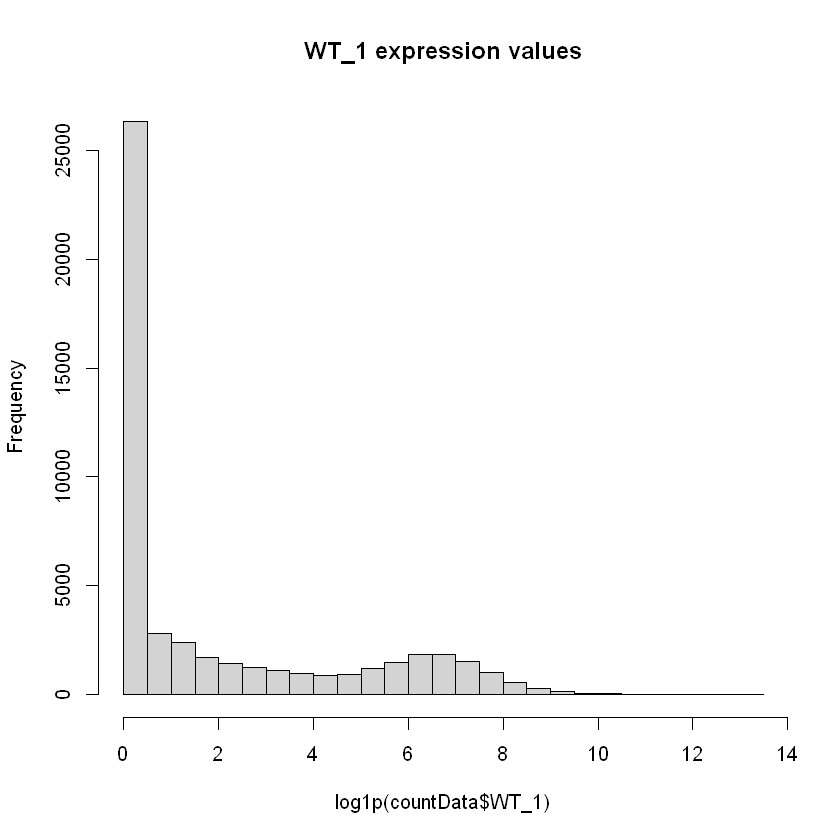

In [50]:
hist(log1p(countData$WT_1), breaks=30, main="WT_1 expression values")

:::{.callout-warning}

This is however not a very useful plot, because a gene can be overexpressed under other conditions, and underexpressed in the WT_1 sample. We can try to look at the gene expression over all individuals for each gene using again a histogram.

:::

we still have a number of genes with little or no expression. Those are of very little relevance in any analysis

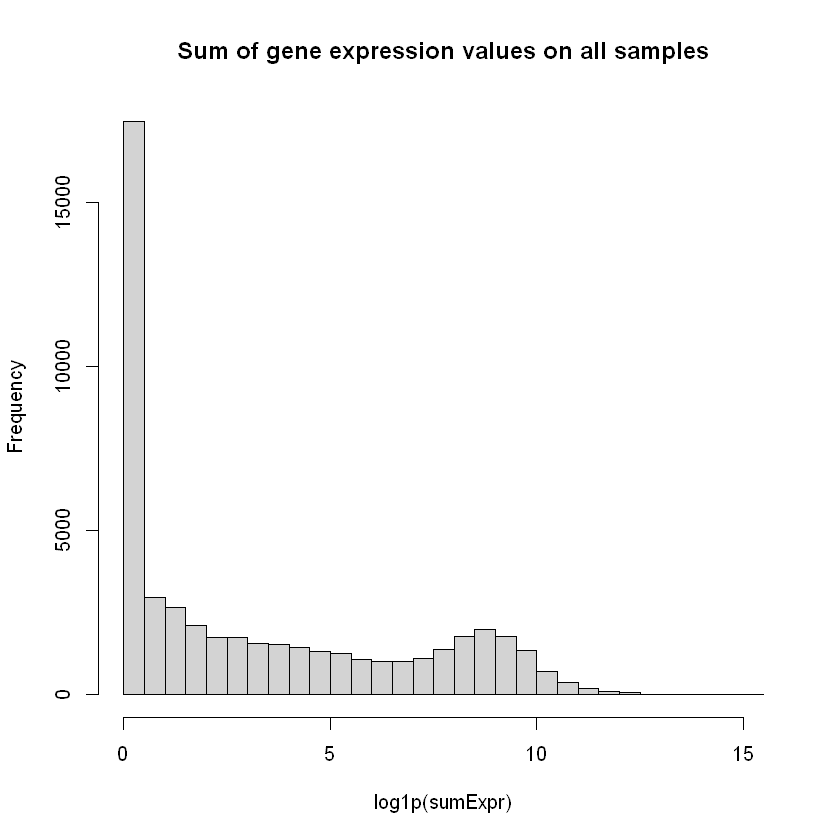

In [52]:
sumExpr <- rowSums( countData[,7:15] )

hist( log1p(sumExpr), breaks=30, main="Sum of gene expression values on all samples")

As an example, we print the fifth gene to see the number of counts. If none of the samples have 5 or more counts of this gene, then we remove the gene.

In [53]:
  countData[5, 7:ncol(countData)] 

,WT_1,WT_2,WT_3,DRUG_1,DRUG_2,DRUG_3,DRUG+SUPPLEMENT_1,DRUG+SUPPLEMENT_2,DRUG+SUPPLEMENT_3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
MIR1302-2,0,0,0,0,0,0,0,0,0


Below we use `subset` to apply the filter. We remove data (genes) contains little to no information. It essentially removes a gene from the countmatrix if the gene has less than 5 counts in all the samples.

In [54]:
countData <- subset(countData, rowSums(countData[, 7:ncol(countData)] > 5) > 0)

We removed a lot of genes!

In [55]:
nrow(countData) #Returning the number of genes after removing noise.

[1] 21473

## Condition matrix

The samples are defined in some condition like WT, DRUG, DRUG+SUPPLEMENT or some other condition.

In [19]:
conditions <- c(rep("WT", 3), rep("DRUG", 3), rep("DRUG+SUPPLEMENT", 3)) 
 

We create a dataframe with the condition and sample information

In [20]:
coldata <- data.frame(row.names = colnames(countData[0, 7:ncol(countData)]), conditions)

In [21]:
coldata

,conditions
,<chr>
WT_1,WT
WT_2,WT
WT_3,WT
DRUG_1,DRUG
DRUG_2,DRUG
DRUG_3,DRUG
DRUG+SUPPLEMENT_1,DRUG+SUPPLEMENT
DRUG+SUPPLEMENT_2,DRUG+SUPPLEMENT
DRUG+SUPPLEMENT_3,DRUG+SUPPLEMENT


We create a subset of the countData so that we have an object only containing only the counts of the samples.

In [22]:
countData_subset <- countData[, -c(1:6)]

In [23]:
head(countData_subset)

,WT_1,WT_2,WT_3,DRUG_1,DRUG_2,DRUG_3,DRUG+SUPPLEMENT_1,DRUG+SUPPLEMENT_2,DRUG+SUPPLEMENT_3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
WASH7P,45,45,37,109,84,107,123,128,72
MIR6859-1,2,1,4,7,10,5,7,6,9
LOC729737,6,3,6,9,7,5,85,81,68
LOC100996442,70,66,61,82,58,70,127,107,100
LOC127239154,6,7,6,23,20,19,5,5,4
LOC100132287,2,4,1,3,2,2,4,6,4


We check if the sample names are correct. Both of these should return TRUE, otherwise there is some incorrect naming.

In [24]:
all(colnames(countData_subset) %in% rownames(coldata))
all(colnames(countData_subset) == rownames(coldata))

[1] TRUE

[1] TRUE

## Applying DeSeq2

Time to use the DESeq2 normalization method to analyse your sequencing data. The commands below run DeSeq2 and

- builds a DeSeq2 object from the data matrix and condition matrix
- applyes DeSeq2
- transforms the expressions by variance stabilization

In [57]:
dds <- DESeqDataSetFromMatrix(count = countData_subset, colData = coldata, design = ~conditions)
dds <- DESeq(dds)
vsdata <- vst(dds, blind=FALSE)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
 

To compute a variance stabilizing transformation is roughly similar to putting the data on the log2 scale, while also dealing with the sampling variability of low counts. It uses the design formula to calculate the within-group variability (if blind=FALSE) or the across-all-samples variability (if blind=TRUE). It does not use the design to remove variation in the data. It therefore does not remove variation that can be associated with batch or other covariates (nor does DESeq2 have a way to specify which covariates are nuisance and which are of interest).

The resulting object is called `vsdata`, which will be used for further analysis with DESeq2

In [84]:
vsdata

class: DESeqTransform 
dim: 21473 9 
metadata(1): version
assays(1): ''
rownames(21473): WASH7P MIR6859-1 ... TRNT TRNP
rowData names(26): baseMean baseVar ... maxCooks dispFit
colnames(9): WT_1 WT_2 ... DRUG+SUPPLEMENT_2 DRUG+SUPPLEMENT_3
colData names(2): conditions sizeFactor

:::{.callout-note title="wrap up"}

You have read and preprocessed a bulk RNA expression matrix and ran an analysis with DeSeq2. Further steps concern visualizing and interpreting the results inferred by DeSeq2 on the data.

:::